Description: You need to code a simple trading strategy in a Jupyter Notebook as per the
given requirements:
1. Define a Class ScriptData which can fetch US Stock data using Alpha Vantage.
[Use this link to get your FREE API Key].
The class should implement the following methods:
a. fetch_intraday_data: (method arguments: script)
Fetches intraday data for given “script” (Example for script: “GOOGL”,
“AAPL”) and stores as it is.
b. convert_intraday_data: (method arguments: script)
Converts fetched intraday data (in point a.) as a pandas DataFrame
(hereafter referred as “df”) with the following columns:
i.
timestamp (data type: pandas.Timestamp)
ii.
open (data type: float)
iii.
high (data type: float)
iv.
low(data type: float)
v.
close (data type: float)
vi.
volume (data type: int)
c. Additional methods for overloading the following operations:
i.
getitem
ii.
setitem
iii.
contains
Sample code showing how the above class will be used:

In [8]:
import pandas as pd
import requests

class ScriptData:
    ALPHA_VANTAGE_API_KEY = 'UASNK34P66SOEG54'
    INTRADAY_API_URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={}&interval=5min&apikey={}'

    def __init__(self, script_name):
        self.script_name = script_name
    

    def fetch_intraday_data(self):
        url = self.INTRADAY_API_URL.format(self.script_name, self.ALPHA_VANTAGE_API_KEY)
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()['Time Series (5min)']
        else:
            print('Error fetching data. Status code:', response.status_code)

    def convert_intraday_data(self):
        intraday_data = self.fetch_intraday_data()
        if intraday_data is None:
            return None

        data = []
        for timestamp, values in intraday_data.items():
            data.append({
                'timestamp': pd.Timestamp(timestamp),
                'open': float(values['1. open']),
                'high': float(values['2. high']),
                'low': float(values['3. low']),
                'close': float(values['4. close']),
                'volume': int(values['5. volume'])
            })

        df = pd.DataFrame(data)
        return df

    def __getitem__(self, key):
        return self.data[key]

    def __setitem__(self, key, value):
        self.data[key] = value

    def __contains__(self, key):
        return key in self.data

    def load_data(self, script):
        self.data = self.convert_intraday_data(script)
        
        
    

In [9]:
script_data = ScriptData('GOOGL')
script_data.fetch_intraday_data()
df = script_data.convert_intraday_data()
df

,timestamp,open,high,low,close,volume
0,2023-02-15 20:00:00,97.120,97.1200,97.1000,97.1000,5305
1,2023-02-15 19:55:00,97.060,97.1200,97.0600,97.1200,11828
2,2023-02-15 19:50:00,97.000,97.0500,97.0000,97.0500,6288
3,2023-02-15 19:45:00,96.950,97.0000,96.9100,96.9800,18206
4,2023-02-15 19:40:00,96.910,96.9500,96.9100,96.9500,3683
...,...,...,...,...,...,...
95,2023-02-15 12:05:00,96.230,96.4450,96.2201,96.4301,710822
96,2023-02-15 12:00:00,96.460,96.5500,96.2100,96.2236,572605
97,2023-02-15 11:55:00,96.595,96.6100,96.3600,96.4507,477423
98,2023-02-15 11:50:00,96.800,96.8468,96.3700,96.5900,1078605


In [10]:
script_data = ScriptData('AAPL')
script_data.fetch_intraday_data()
df1 = script_data.convert_intraday_data()
df1

,timestamp,open,high,low,close,volume
0,2023-02-15 20:00:00,155.4800,155.5100,155.4800,155.4800,14236
1,2023-02-15 19:55:00,155.4800,155.5000,155.4800,155.4900,2574
2,2023-02-15 19:50:00,155.4399,155.4399,155.4399,155.4399,477
3,2023-02-15 19:45:00,155.4900,155.4900,155.4000,155.4000,12929
4,2023-02-15 19:40:00,155.4800,155.5000,155.4500,155.4900,3467
...,...,...,...,...,...,...
95,2023-02-15 12:00:00,155.3199,155.4300,155.2300,155.2500,825804
96,2023-02-15 11:55:00,155.3100,155.5000,155.2800,155.3100,800875
97,2023-02-15 11:50:00,154.9700,155.3500,154.9200,155.3100,1624024
98,2023-02-15 11:45:00,154.7850,154.9750,154.7600,154.9600,815483


# 2. Define a function called indicator1. It should take “df” and ‘timeperiod’ (integer) as
inputs and give another pandas DataFrame as an output with two columns:
a. timestamp: Same as ‘timestamp’ column in ‘df’
b. indicator: Moving Average of the ‘close’ column in ‘df’. The number of
elements to be taken for a moving average is defined by ‘timeperiod’. For
example, if ‘timeperiod’ is 5, then each row in this column will be an average
of total 5 previous values (including current value) of the ‘close’ column.
Some sample code has been given below which shows how the above function will be used:

In [11]:
def indicator1(df, timeperiod):
    ma = df['close'].rolling(window=timeperiod).mean()
    result_df = pd.DataFrame({
        'timestamp': df['timestamp'],
        'indicator': ma
    })
    return result_df

In [176]:
indicator1(df,5)

,timestamp,indicator
0,2023-02-14 20:00:00,NaN
1,2023-02-14 19:55:00,NaN
2,2023-02-14 19:50:00,NaN
3,2023-02-14 19:45:00,NaN
4,2023-02-14 19:40:00,94.06400
...,...,...
95,2023-02-14 12:00:00,92.79670
96,2023-02-14 11:55:00,92.69828
97,2023-02-14 11:50:00,92.60128
98,2023-02-14 11:45:00,92.53490


In [177]:
indicator1(df1,5)

,timestamp,indicator
0,2023-02-14 20:00:00,NaN
1,2023-02-14 19:55:00,NaN
2,2023-02-14 19:50:00,NaN
3,2023-02-14 19:45:00,NaN
4,2023-02-14 19:40:00,152.784
...,...,...
95,2023-02-14 12:00:00,151.840
96,2023-02-14 11:55:00,151.746
97,2023-02-14 11:50:00,151.660
98,2023-02-14 11:45:00,151.522


# 3. Define a class Strategy, which can do the following, given a script name:
a. Fetch intraday historical day (‘df’) using ScriptData class.
We’ll refer to the ‘close’ column of ‘df’ as close_data.
b. Compute indicator data on ‘close’ of ‘df’ using indicator1 function.
We’ll refer to the ‘indicator’ column of this data as indicator_data.
c. Generate a pandas DataFrame called ‘signals’ with 2 columns:
i.
‘timestamp’: Same as ‘timestamp’ column in ‘df’
ii.
‘signal’: This column can have the following values:
1. BUY (When: If indicator_data cuts close_data upwards)
2. SELL (When: If indicator_data cuts close_data downwards)
3. NO_SIGNAL (When: If indicator_data and close_data don’t cut
each other)
Example of ‘Cut Upwards’, ‘Cut Downwards’, ‘Do not cut each
other’:
As an example, for the below graph, if the RED line is
close_data and GREY line is indicator_data, then:
1. The BLUE points represent the instances when
indicator_data has cut close_data ‘downwards’
2. The PINK points represent the instances when
indicator_data has cut close_data ‘upwards
3. The YELLOW points represent when indicator_data
and close_data don’t cut each other.
So, there will be SELL signal for BLUE timestamps, ‘BUY’
signal for PINK timestamp and ‘NO_SIGNAL’ for yellow
timestamps.d. Print the ‘signals’ DataFrame with only those rows where the signal is either
‘BUY’ or ‘SELL’.

In [19]:
import pandas as pd
import pyalgotrading as algo

class Strategy:
    def __init__(self, script):
        self.script = script
        self.script_data = ScriptData(script)
    
    def get_script_data(self):
        intraday_data = self.script_data.convert_intraday_data()
        df = self.script_data.convert_intraday_data()
        return df
    
    def generate_signals(self, timeperiod):
        # Step 1: Fetch intraday historical day (‘df’) using ScriptData class
        df = self.get_script_data()

        # Step 2: Compute indicator data on ‘close’ of ‘df’ using indicator1 function
        indicator_data = self.indicator1(df, timeperiod)

        # Step 3: Generate signals based on indicator and close data
        signals = pd.DataFrame({
            'timestamp': df['timestamp'],
            'signal': 'NO_SIGNAL'
        })
        signals.loc[indicator_data['indicator'] > df['close'], 'signal'] = 'BUY'
        signals.loc[indicator_data['indicator'] < df['close'], 'signal'] = 'SELL'
        
        # Step 4: Print the ‘signals’ DataFrame with only those rows where the signal is either ‘BUY’ or ‘SELL’.
        print(signals[signals['signal'].isin(['BUY', 'SELL'])])
        
    def indicator1(self, df, timeperiod):
        ma = df['close'].rolling(window=timeperiod).mean()
        result_df = pd.DataFrame({
            'timestamp': df['timestamp'],
            'indicator': ma
        })
        return result_df


In [52]:
str = Strategy('NVDA')
signals = str.generate_signals(2)

             timestamp signal
1  2023-02-15 19:55:00   SELL
2  2023-02-15 19:50:00    BUY
3  2023-02-15 19:45:00    BUY
4  2023-02-15 19:40:00   SELL
5  2023-02-15 19:35:00   SELL
..                 ...    ...
95 2023-02-15 12:05:00   SELL
96 2023-02-15 12:00:00   SELL
97 2023-02-15 11:55:00   SELL
98 2023-02-15 11:50:00    BUY
99 2023-02-15 11:45:00    BUY

[97 rows x 2 columns]


In [62]:
df2 = str.get_script_data()
print(df2)

             timestamp      open    high     low     close  volume
0  2023-02-15 20:00:00  228.1800  228.18  228.00  228.1400    5595
1  2023-02-15 19:55:00  228.1000  228.22  227.95  228.2200    4066
2  2023-02-15 19:50:00  227.8900  228.00  227.89  228.0000    3533
3  2023-02-15 19:45:00  228.0500  228.05  227.86  227.8700    3258
4  2023-02-15 19:40:00  228.0000  228.05  227.86  227.9900    2744
..                 ...       ...     ...     ...       ...     ...
95 2023-02-15 12:05:00  225.6562  225.92  225.28  225.3099  334155
96 2023-02-15 12:00:00  226.3700  226.72  225.46  225.6200  573870
97 2023-02-15 11:55:00  226.3120  226.50  226.12  226.3571  360999
98 2023-02-15 11:50:00  225.7400  226.50  225.54  226.2788  665129
99 2023-02-15 11:45:00  225.1000  225.80  224.87  225.7000  575831

[100 rows x 6 columns]


In [60]:
high = df['high']
low = df['low']
timestamp =df['timestamp']

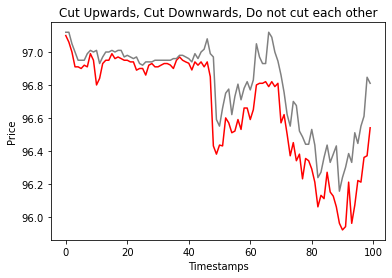

In [61]:
import matplotlib.pyplot as plt

# define close_data and indicator_data
script_data = ScriptData('NVDA')
script_data.fetch_intraday_data()
DF = script_data.convert_intraday_data()

close_data = DF['close']
indicator_data = indicator1(DF,5)

# initialize a figure
fig, ax = plt.subplots()

# plot close_data and indicator_data
ax.plot(low, color='red')
ax.plot(high, color='grey')

# mark the points where indicator_data has cut close_data
# for i in range(1, len(close_data)):
#     if indicator_data[i-1] > close_data[i-1] and indicator_data[i] < close_data[i]:
#         ax.scatter(i, close_data[i], color='blue', marker='v')
#     elif indicator_data[i-1] < close_data[i-1] and indicator_data[i] > close_data[i]:
#         ax.scatter(i, close_data[i], color='pink', marker='^')
#     else:
#         ax.scatter(i, close_data[i], color='yellow', marker='o')

# add labels and title
ax.set_xlabel('Timestamps')
ax.set_ylabel('Price')
ax.set_title('Cut Upwards, Cut Downwards, Do not cut each other')

# show the plot
plt.show()
